# Fine-tuning yolov5 for drowsiness detection

## Imports

In [2]:
!pip install torch torchvision torchaudio

In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

## Loading & testing initial model

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ravel/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-8-1 Python-3.11.9 torch-2.4.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Detection using an uploaded image

In [8]:
img = 'Cars.jpg'

In [9]:
results = model(img)
results.print()

C:\Users\ravel/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 33.3ms pre-process, 440.5ms inference, 11.5ms NMS per image at shape (1, 3, 448, 640)


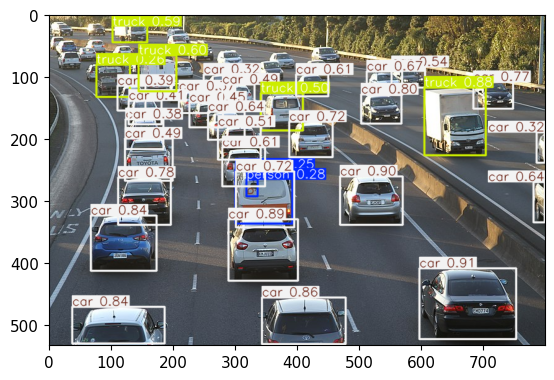

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

### Real-time detection using camera

In [12]:
#cap = cv2.VideoCapture(0)
#while cap.isOpened():
    #ret, frame = cap.read()
    
    # Make detections 
    #results = model(frame)
    
    #cv2.imshow('YOLO', np.squeeze(results.render()))
    
    #if cv2.waitKey(10) & 0xFF == ord('q'):
        #break
#cap.release()
#cv2.destroyAllWindows()

IndentationError: unexpected indent (3700242226.py, line 3)

## Fine-tuning the model

### Images labelling

In [2]:
import uuid   # Unique identifier
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 30

In [16]:
# Loop through labels
for label in labels:
    print(f'Processing images for {label}')
    
    # Get all images for the current label
    image_files = [f for f in os.listdir(IMAGES_PATH) if f.startswith(label)]
    
    # Loop through image files
    for img_num, img_file in enumerate(image_files):
        print(f'Processing image {img_file}')
        
        # Read the image
        img_path = os.path.join(IMAGES_PATH, img_file)
        frame = cv2.imread(img_path)
        
        # Generate a new name with a unique identifier
        new_img_name = f"{label}.{uuid.uuid1()}.jpg"
        new_img_path = os.path.join(IMAGES_PATH, new_img_name)
        
        # Save the image with the new name
        cv2.imwrite(new_img_path, frame)
        
        # Remove the old image
        os.remove(img_path)
        
        # Render to the screen (optional)
        cv2.imshow('Image Processing', frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cv2.destroyAllWindows()

Processing images for awake
Processing image awake (1).jpg
Processing image awake (10).jpg
Processing image awake (11).jpg
Processing image awake (12).jpg
Processing image awake (14).jpg
Processing image awake (16).jpg
Processing image awake (18).jpg
Processing image awake (2).jpg
Processing image awake (20).jpg
Processing image awake (21).jpg
Processing image awake (3).jpg
Processing image awake (34).jpg
Processing image awake (36).jpg
Processing image awake (38).jpg
Processing image awake (39).jpg
Processing image awake (41).jpg
Processing image awake (42).jpg
Processing image awake (43).jpg
Processing image awake (44).jpg
Processing image awake (5).jpg
Processing image awake (51).jpg
Processing image awake (53).jpg
Processing image awake (55).jpg
Processing image awake (61).jpg
Processing image awake (62).jpg
Processing image awake (63).jpg
Processing image awake (68).jpg
Processing image awake (71).jpg
Processing image awake (72).jpg
Processing image awake (9).jpg
Processing images

### If you wanna take images yourself using your camera and label them after

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

### Tests

In [17]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.90c11f92-5030-11ef-a356-e884ecae163d.jpg


In [18]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname) 

data\images\awake.940a0387-5030-11ef-a80e-e884ecae163d.jpg
data\images\awake.940a0388-5030-11ef-951d-e884ecae163d.jpg
data\images\awake.940a0389-5030-11ef-a608-e884ecae163d.jpg
data\images\awake.940a038a-5030-11ef-9b6a-e884ecae163d.jpg
data\images\awake.940a038b-5030-11ef-bc40-e884ecae163d.jpg
data\images\awake.940a038c-5030-11ef-99d1-e884ecae163d.jpg
data\images\awake.940a038d-5030-11ef-84da-e884ecae163d.jpg
data\images\awake.940a2d46-5030-11ef-85ca-e884ecae163d.jpg
data\images\awake.940a2d47-5030-11ef-88c7-e884ecae163d.jpg
data\images\awake.940a2d48-5030-11ef-ae0c-e884ecae163d.jpg
data\images\awake.940a2d49-5030-11ef-9864-e884ecae163d.jpg
data\images\awake.940a2d4a-5030-11ef-bb07-e884ecae163d.jpg
data\images\awake.940a2d4b-5030-11ef-9a59-e884ecae163d.jpg
data\images\awake.940a2d4c-5030-11ef-84f5-e884ecae163d.jpg
data\images\awake.940a2d4d-5030-11ef-a119-e884ecae163d.jpg
data\images\awake.940a2d4e-5030-11ef-873f-e884ecae163d.jpg
data\images\awake.940a2d4f-5030-11ef-b535-e884ecae163d.j

### Labelling using tzutalin's labelImg repository(It's archived now so you have to dowload the zip version and unzip it on your work directory)

In [ ]:
#!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
error: RPC failed; curl 92 HTTP/2 stream 5 was not closed cleanly: CANCEL (err 8)
error: 20 bytes of body are still expected
fetch-pack: unexpected disconnect while reading sideband packet
fatal: early EOF
fatal: fetch-pack: invalid index-pack output


In [9]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [1]:
!cd yolov5 && python train.py --img 620 --batch 8 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=620, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-350-g6096750f Python-3.11.9 torch-2.4.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a

## Loading trained model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ravel/.cache\torch\hub\master.zip
YOLOv5  2024-8-7 Python-3.11.9 torch-2.4.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data', 'images', 'awake.c3b881f4-502f-11ef-a63f-e884ecae163d.jpg')

In [5]:
results = model(img)

C:\Users\ravel/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [6]:
results.print()

image 1/1: 1280x960 1 awake
Speed: 38.6ms pre-process, 210.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 480)


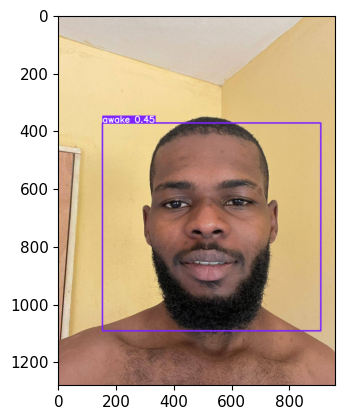

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

## Real-time

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\ravel/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ravel/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ravel/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ravel/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ravel/.cache\torch\hub\ultralytics_yolov5_master\models

KeyboardInterrupt: 

: 